<a href="https://colab.research.google.com/github/alexandra-hidalgo/datasci_5_statistics-/blob/main/datasci_5_statistics_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages


In [11]:
import pandas as pd
import scipy
from scipy.stats import chi2_contingency as chi2
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Chi-Square Test

### Hypothesis
Are physicians under Medicare prescribing patients Opioids and Antibiotics at the ssme time?

In [3]:
df = pd.read_csv('Medicare_Part_D_Prescribers_by_Geography_and_Drug_2021.csv')
df

<ipython-input-3-c8fc6c1d3425>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Medicare_Part_D_Prescribers_by_Geography_and_Drug_2021.csv')


,Prscrbr_Geo_Lvl,Prscrbr_Geo_Cd,Prscrbr_Geo_Desc,Brnd_Name,Gnrc_Name,Tot_Prscrbrs,Tot_Clms,Tot_30day_Fills,Tot_Drug_Cst,Tot_Benes,...,GE65_Tot_30day_Fills,GE65_Tot_Drug_Cst,GE65_Bene_Sprsn_Flag,GE65_Tot_Benes,LIS_Bene_Cst_Shr,NonLIS_Bene_Cst_Shr,Opioid_Drug_Flag,Opioid_LA_Drug_Flag,Antbtc_Drug_Flag,Antpsyct_Drug_Flag
0,National,NaN,National,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1178,3708,6598.5,102280.76,1313.0,...,5385.3,79992.58,NaN,1052.0,4167.66,22903.26,N,N,N,N
1,National,NaN,National,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1604,4564,7905.6,131927.33,1766.0,...,6603.0,106683.88,NaN,1450.0,4415.22,20335.83,N,N,N,N
2,National,NaN,National,Abacavir,Abacavir Sulfate,3560,30534,37402.4,7039482.37,4252.0,...,19275.5,3547013.16,NaN,2141.0,21278.04,186025.79,N,N,N,N
3,National,NaN,National,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,2933,30248,38810.9,9656849.77,4030.0,...,22159.0,5457642.63,NaN,2272.0,23576.53,376349.75,N,N,N,N
4,National,NaN,National,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,38,118,120.0,146795.20,32.0,...,74.0,91779.21,NaN,19.0,1488.48,3939.47,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114886,State,9E,Foreign Country,Zaleplon,Zaleplon,2,18,18.0,315.49,NaN,...,18.0,315.49,*,NaN,0.00,61.47,N,N,N,N
114887,State,9E,Foreign Country,Zarxio,Filgrastim-Sndz,1,40,40.0,34498.72,15.0,...,40.0,34498.72,NaN,15.0,5.00,8815.21,N,N,N,N
114888,State,9E,Foreign Country,Ziprasidone Hcl,Ziprasidone Hcl,5,55,67.0,6356.96,11.0,...,NaN,NaN,*,NaN,50.68,78.84,N,N,N,Y
114889,State,9E,Foreign Country,Zolpidem Tartrate,Zolpidem Tartrate,13,110,134.3,1143.03,48.0,...,95.3,638.81,NaN,35.0,54.32,420.37,N,N,N,N


In [10]:
df['Opioid_Drug_Flag'].value_counts()


N    112557
Y      2334
Name: Opioid_Drug_Flag, dtype: int64

In [11]:
df['Antbtc_Drug_Flag'].value_counts()

N    110072
Y      4819
Name: Antbtc_Drug_Flag, dtype: int64

In [9]:
contingency_table = pd.crosstab(df['Opioid_Drug_Flag'], df['Antbtc_Drug_Flag'])
print(contingency_table)

Antbtc_Drug_Flag       N     Y
Opioid_Drug_Flag              
N                 107738  4819
Y                   2334     0


In [14]:
chi2, p, _, _ = chi2(contingency_table)
print(f"chi2 value: {chi2}")
print(f"P-value: {p}")

chi2 value: 103.239724899147
P-value: 2.969517382555205e-24


### Results
Taking antibiotics alongside opioids may increase the risk of opioid abuse. After this data analysis we can concluded that not patient was prescribed both medications at the same time.

# T-Test

### Hypothesis
Is there a difference in the mean of prevalence of Osteoporosis between Southern and not southern states?

In [26]:
Chronic_Conditions = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/cms-chronic-conditions/CC_R20_P08_v10_D18_WWDSE_Cond_complete.csv')
Chronic_Conditions

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes,is_southern
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557,southern
1,State,Alabama,1.0,All,All,All,Alzheimer's Disease/Dementia,0.1140,25051.8813,22554.0576,0.2119,1410.8355,southern
2,State,Alabama,1.0,All,All,All,Arthritis,0.3897,15827.4930,14403.5780,0.1775,998.3314,southern
3,State,Alabama,1.0,All,All,All,Asthma,0.0499,20560.6948,18914.5834,0.2117,1614.4483,southern
4,State,Alabama,1.0,All,All,All,Atrial Fibrillation,0.0793,25450.4587,23414.3381,0.2268,1450.9822,southern
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,State,Wyoming,56.0,All,All,All,Hypertension,0.4038,14596.5257,16604.1539,0.1563,1032.4567,non-southern
1047,State,Wyoming,56.0,All,All,All,Ischemic Heart Disease,0.2010,17492.8555,20113.1132,0.1772,1248.6805,non-southern
1048,State,Wyoming,56.0,All,All,All,Osteoporosis,0.0480,19099.8147,21672.1663,0.1684,1137.0338,non-southern
1049,State,Wyoming,56.0,All,All,All,Schizophrenia and Other Psychotic Disorders,0.0154,16458.9524,18485.6017,0.2006,2171.5057,non-southern


In [27]:
# Keeping only complete rows
Chronic_Conditions = Chronic_Conditions.dropna()
len(Chronic_Conditions)

1051

In [ ]:
Osteoporosis_data = Chronic_Conditions[Chronic_Conditions['Bene_Cond'] == 'Osteoporosis']
Osteoporosis_data


In [38]:
# Spliting the data in two groups
southern_data = Osteoporosis_data[Osteoporosis_data['is_southern'] == 'southern']['Prvlnc']
southern_data

18      0.0612
79      0.0599
163     0.0607
183     0.0472
204     0.0834
225     0.0570
368     0.0545
389     0.0603
430     0.0643
514     0.0544
700     0.0608
761     0.0565
844     0.0583
885     0.0569
906     0.0682
966     0.0600
1008    0.0543
Name: Prvlnc, dtype: float64

In [40]:
non_southern_data = Osteoporosis_data[Osteoporosis_data['is_southern'] == 'non-southern']['Prvlnc']
non_southern_data

37      0.0395
58      0.0739
100     0.0784
121     0.0622
142     0.0764
244     0.0938
263     0.0551
284     0.0651
305     0.0632
326     0.0630
347     0.0635
409     0.0508
451     0.0754
472     0.0577
493     0.0497
535     0.0635
554     0.0586
575     0.0673
596     0.0569
616     0.0561
637     0.0703
658     0.0650
679     0.0728
719     0.0730
740     0.0622
782     0.0544
803     0.0741
823     0.0632
864     0.0693
925     0.0613
945     0.0442
987     0.0528
1029    0.0559
1048    0.0480
Name: Prvlnc, dtype: float64

In [43]:
t_stat, p_val = ttest_ind(southern_data, non_southern_data, equal_var=False)


In [44]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


T-statistic: -1.1254398255725588
P-value: 0.26655807360859374


### Calculating the mean between southern and non-southern states

In [46]:
southern_mean = southern_data.mean()
southern_mean

0.059876470588235295

In [47]:
non_southern_mean = non_southern_data.mean()
non_southern_mean

0.06284117647058822

## Conclusions
There is only a slight difference between the mean of Osteoporosis between the southern and non-southern states.

# ANOVA

### Hypothesis
Do the geographic area and type have an impact in the blood lead levels (BLL) in children under 6 with a Number of BLL >=10 ug/dl?

In [4]:
df = pd.read_csv('Children_ELL.csv')
df

,geo_type,geo_area_id,geo_area_name,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested_NOTES"
0,Borough,1,Bronx,1.0,2005,8245,NaN,595,NaN,167,NaN,64500,NaN,127.7,NaN,9.2,NaN,2.6,NaN
1,Borough,1,Bronx,1.0,2006,7272,NaN,474,NaN,144,NaN,67200,NaN,108.2,NaN,7.1,NaN,2.1,NaN
2,Borough,1,Bronx,1.0,2007,6174,NaN,438,NaN,135,NaN,68300,NaN,90.4,NaN,6.4,NaN,2.0,NaN
3,Borough,1,Bronx,1.0,2008,4254,NaN,292,NaN,105,NaN,69800,NaN,60.9,NaN,4.2,NaN,1.5,NaN
4,Borough,1,Bronx,1.0,2009,2742,NaN,278,NaN,103,NaN,70000,NaN,39.2,NaN,4.0,NaN,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Neighborhood (UHF 42),104,Pelham - Throgs Neck,1.0,2005,1314,NaN,86,NaN,24,NaN,11600,NaN,113.2,NaN,7.4,NaN,2.1,NaN
572,Neighborhood (UHF 42),301,Washington Heights,3.0,2006,1115,NaN,104,NaN,36,NaN,11200,NaN,99.8,NaN,9.3,NaN,3.2,NaN
573,Neighborhood (UHF 42),407,Southwest Queens,4.0,2013,239,NaN,39,NaN,15,NaN,11400,NaN,20.9,NaN,3.4,NaN,1.3,NaN
574,Neighborhood (UHF 42),106,High Bridge - Morrisania,1.0,2013,281,NaN,31,NaN,9,*Estimate is based on small numbers so should ...,11800,NaN,23.8,NaN,2.6,NaN,0.8,*Estimate is based on small numbers so should ...


In [52]:
df.columns

Index(['geo_type', 'geo_area_id', 'geo_area_name', 'borough_id', 'time_period',
       'Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL',
       'Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL _NOTES',
       'Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL',
       'Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL _NOTES',
       'Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL',
       'Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL _NOTES',
       'Children under 6 years with elevated blood lead levels (BLL) Number Tested',
       'Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES',
       'Children under 6 years with elevated blood lead levels (BLL) Rate  BLL>=5 µg/dL per 1,000 tested',
       'Children under 6 years with elevated blood lead levels 

In [5]:
# Clearing columns names
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['geo_type', 'geo_area_id', 'geo_area_name', 'borough_id', 'time_period',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL_>=5_µg/dL',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL_>=5_µg/dL__NOTES',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL__NOTES',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=15_µg/dL',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=15_µg/dL__NOTES',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_Tested',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_Tested__NOTES',
       'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Rate__BLL>=5_µg/dL_per_1,000_tested',
       'Children_under_6_years_with_elevated_blood_lead_levels_

In [6]:
df2 = df[['geo_type', 'geo_area_name', 'Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL']]
df2

,geo_type,geo_area_name,Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL
0,Borough,Bronx,595
1,Borough,Bronx,474
2,Borough,Bronx,438
3,Borough,Bronx,292
4,Borough,Bronx,278
...,...,...,...
571,Neighborhood (UHF 42),Pelham - Throgs Neck,86
572,Neighborhood (UHF 42),Washington Heights,104
573,Neighborhood (UHF 42),Southwest Queens,39
574,Neighborhood (UHF 42),High Bridge - Morrisania,31


In [7]:
df2.dtypes

geo_type                                                                             object
geo_area_name                                                                        object
Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL     int64
dtype: object

In [8]:
print(df2.isnull().sum())
print(df2.describe())

geo_type                                                                             0
geo_area_name                                                                        0
Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL    0
dtype: int64
       Children_under_6_years_with_elevated_blood_lead_levels_(BLL)_Number_BLL>=10_µg/dL
count                                         576.000000                                
mean                                           99.234375                                
std                                           274.841442                                
min                                             0.000000                                
25%                                            12.000000                                
50%                                            31.000000                                
75%                                            68.000000                                
max           

# Regression

In [19]:
SNF = pd.read_csv('SNF_Cost_Report_2019.csv')
SNF

,rpt_rec_num,Provider CCN,Facility Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural versus Urban,...,Less Contractual Allowance and discounts on patients' accounts,Net Patient Revenue,Less Total Operating Expense,Net Income from service to patients,Total Other Income,Total Income,Net Income,Inpatient PPS Amount,Nursing and Allied Health Education Activities,Allowable Bad Debts
0,1226920,525009,CROSSROADS CARE CENTER OF EAST GREEN,600 S WEBSTER AVENUE,GREEN BAY,WI,54301,BROWN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1228236,45228,MAPLE HEALTHCARE,200 S MAPLE STREET,HAZEN,AR,72064,PRAIRIE,99904.0,R,...,23226.0,394582.0,377298.0,17284.0,NaN,17284.0,17284.0,28381.0,NaN,NaN
2,1230331,435123,GOOD SAMARITAN SOCIETY-SELBY,4861 LINCOLN AVE,SELBY,SD,57472-0299,WALWORHT,99943.0,R,...,206443.0,527817.0,1674336.0,-1146519.0,4910.0,-1141609.0,-1143442.0,92469.0,NaN,NaN
3,1232670,525232,CCC OF WEST GREEN BAY LLC,1760 SHAWANO AVENUE,GREEN BAY,WI,54303,BROWN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235138,35270,LA ESTANCIA NURSING & REHAB CENTER,15810 SOUTH 42ND STREET,PHOENIX,AZ,85048,MARICOPA,38060.0,U,...,303500.0,1581076.0,1509975.0,71101.0,150.0,71251.0,71251.0,184409.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15176,1322516,395006,ST. JOSEPH MANOR,1616 HUNTINGDON PIKE,MEADOWBROOK,PA,19046,MONTGOMERY,33874.0,U,...,26206259.0,36459830.0,37074550.0,-614720.0,2490647.0,1875927.0,1036386.0,6031610.0,NaN,49092.0
15177,1322554,515035,RIVERSIDE H&R CTR,6500 MACCORKLE AVE SW,ST ALBANS,WV,25177,KANAWHA,16620.0,U,...,4529711.0,10307003.0,10908401.0,-601398.0,579227.0,-22171.0,-22171.0,2107367.0,NaN,137081.0
15178,1323202,56326,BURLINGTON CONVALESCENT HOSPITAL,845 S BURLINGTON AVENUE,LOS ANGELES,CA,90057,LOS ANGELES,31084.0,U,...,6328937.0,12239450.0,11762103.0,477347.0,9558.0,486905.0,486905.0,5161225.0,NaN,20888.0
15179,1323383,465116,RMC - LOGAN,1480 N 400 E,LOGAN,UT,84341,CACHE,30860.0,U,...,7610557.0,6991100.0,7237867.0,-246767.0,760330.0,513563.0,513563.0,771760.0,NaN,52270.0


In [20]:
SNF.columns

Index(['rpt_rec_num', 'Provider CCN', 'Facility Name', 'Street Address',
       'City', 'State Code', 'Zip Code', 'County', 'Medicare CBSA Number',
       'Rural versus Urban',
       ...
       'Less Contractual Allowance and discounts on patients' accounts',
       'Net Patient Revenue', 'Less Total Operating Expense',
       'Net Income from service to patients', 'Total Other Income',
       'Total Income', 'Net Income', 'Inpatient PPS Amount',
       'Nursing and Allied Health Education Activities',
       'Allowable Bad Debts'],
      dtype='object', length=122)

In [21]:
# Clearing columns names
SNF.columns = SNF.columns.str.replace(' ', '_')
SNF.columns

Index(['rpt_rec_num', 'Provider_CCN', 'Facility_Name', 'Street_Address',
       'City', 'State_Code', 'Zip_Code', 'County', 'Medicare_CBSA_Number',
       'Rural_versus_Urban',
       ...
       'Less_Contractual_Allowance_and_discounts_on_patients'_accounts',
       'Net_Patient_Revenue', 'Less_Total_Operating_Expense',
       'Net_Income_from_service_to_patients', 'Total_Other_Income',
       'Total_Income', 'Net_Income', 'Inpatient_PPS_Amount',
       'Nursing_and_Allied_Health_Education_Activities',
       'Allowable_Bad_Debts'],
      dtype='object', length=122)

In [24]:
# Removing roas with missing data
SNF = SNF.dropna()
SNF

,Number_of_Beds,Net_Patient_Revenue,Net_Income_from_service_to_patients,Net_Income
1,70.0,394582.0,17284.0,17284.0
2,50.0,527817.0,-1146519.0,-1143442.0
4,192.0,1581076.0,71101.0,71251.0
5,45.0,250591.0,-655194.0,-654846.0
6,103.0,1418580.0,-184908.0,-181890.0
...,...,...,...,...
15176,359.0,36459830.0,-614720.0,1036386.0
15177,102.0,10307003.0,-601398.0,-22171.0
15178,124.0,12239450.0,477347.0,486905.0
15179,112.0,6991100.0,-246767.0,513563.0


In [25]:
## vars of interest: Number of Beds, FTE - Employees on Payroll, Patient Revenue, Outpatient Revenue
SNF = SNF[['Number_of_Beds', 'Net_Patient_Revenue', 'Net_Income_from_service_to_patients', 'Net_Income']]
SNF

,Number_of_Beds,Net_Patient_Revenue,Net_Income_from_service_to_patients,Net_Income
1,70.0,394582.0,17284.0,17284.0
2,50.0,527817.0,-1146519.0,-1143442.0
4,192.0,1581076.0,71101.0,71251.0
5,45.0,250591.0,-655194.0,-654846.0
6,103.0,1418580.0,-184908.0,-181890.0
...,...,...,...,...
15176,359.0,36459830.0,-614720.0,1036386.0
15177,102.0,10307003.0,-601398.0,-22171.0
15178,124.0,12239450.0,477347.0,486905.0
15179,112.0,6991100.0,-246767.0,513563.0


In [28]:
# lets remove outliers, greater then 3 SDs from the mean
SNF = SNF[(SNF['Number_of_Beds'] - SNF['Number_of_Beds'].mean()) / SNF['Number_of_Beds'].std() < 3]
SNF = SNF[(SNF['Net_Patient_Revenue'] - SNF['Net_Patient_Revenue'].mean()) / SNF['Net_Patient_Revenue'].std() < 3]
SNF = SNF[(SNF['Net_Income_from_service_to_patients'] - SNF['Net_Income_from_service_to_patients'].mean()) / SNF['Net_Income_from_service_to_patients'].std() < 3]
SNF = SNF[(SNF['Net_Income'] - SNF['Net_Income'].mean()) / SNF['Net_Income'].std() < 3]



In [29]:
SNF.head(20)

,Number_of_Beds,Net_Patient_Revenue,Net_Income_from_service_to_patients,Net_Income
1,70.0,394582.0,17284.0,17284.0
2,50.0,527817.0,-1146519.0,-1143442.0
4,192.0,1581076.0,71101.0,71251.0
5,45.0,250591.0,-655194.0,-654846.0
6,103.0,1418580.0,-184908.0,-181890.0
7,99.0,337202.0,-45159.0,-43295.0
8,71.0,1021280.0,166305.0,169936.0
9,66.0,209650.0,-648964.0,-651687.0
10,191.0,1906511.0,-73578.0,-73478.0
11,118.0,917049.0,-56889.0,-56842.0


In [31]:
# Defining the dependent and independent variables
X = SNF['Number_of_Beds']
y = SNF['Net_Patient_Revenue']

In [32]:
# Add a constant to the independent variable (required for the statsmodels regression model)
X = sm.add_constant(X)

In [33]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [34]:
# Printing the summary of the regression
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Net_Patient_Revenue   R-squared:                       0.385
Model:                             OLS   Adj. R-squared:                  0.385
Method:                  Least Squares   F-statistic:                     8636.
Date:                 Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                         21:13:35   Log-Likelihood:            -2.2715e+05
No. Observations:                13777   AIC:                         4.543e+05
Df Residuals:                    13775   BIC:                         4.543e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.291e+06      8e+

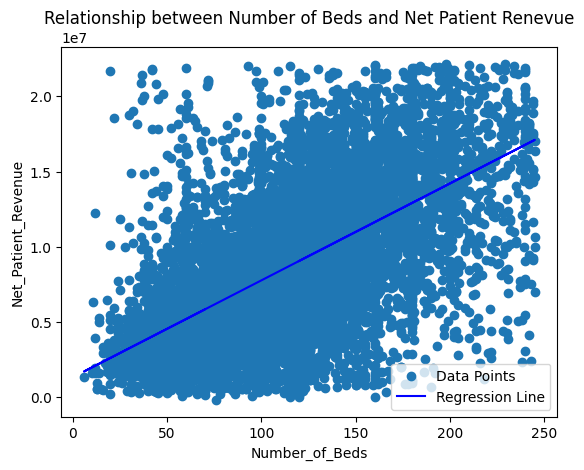

In [36]:
plt.scatter(SNF['Number_of_Beds'], SNF['Net_Patient_Revenue'], label='Data Points')
plt.plot(SNF['Number_of_Beds'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('Number_of_Beds')
plt.ylabel('Net_Patient_Revenue')
plt.title('Relationship between Number of Beds and Net Patient Renevue')
plt.legend()
plt.show()